<a href="https://colab.research.google.com/github/PavelYakimov/dpo-cv/blob/main/Day-8/Day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

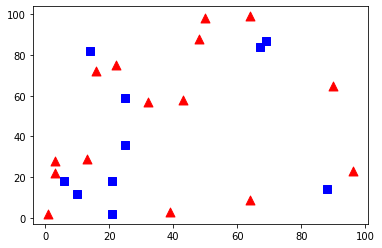

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# Feature set containing (x,y) values of 25 known/training data
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# Label each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0,2,(25,1)).astype(np.float32)
# Take Red neighbours and plot them
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
# Take Blue neighbours and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
plt.show()

result:  [[1.]]

neighbours:  [[0. 1. 1.]]

distance:  [[  97. 1224. 1249.]]



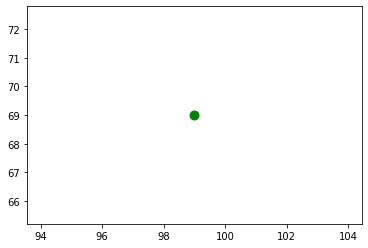

In [ ]:
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print( "result:  {}\n".format(results) )
print( "neighbours:  {}\n".format(neighbours) )
print( "distance:  {}\n".format(dist) )
plt.show()

In [ ]:
# 10 new-comers
newcomers = np.random.randint(0,100,(10,2)).astype(np.float32)
ret, results,neighbours,dist = knn.findNearest(newcomer, 3)
# The results also will contain 10 labels.

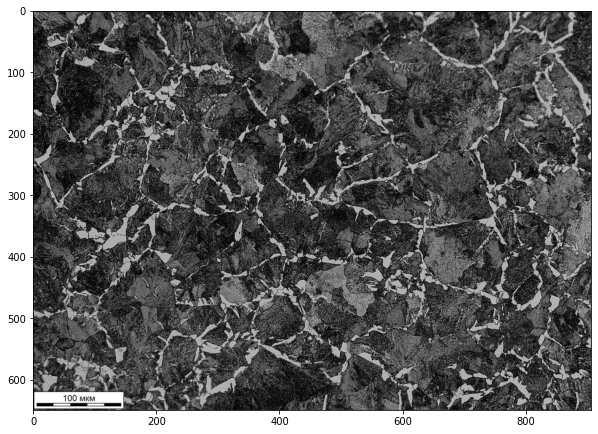

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
path = 'pic2.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
#print(img)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)


In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=20

In [ ]:
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

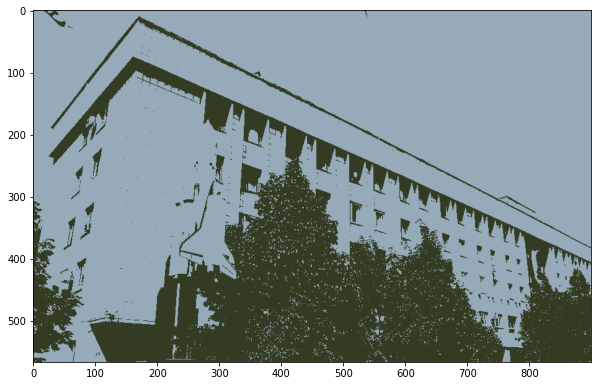

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(result_image)
plt.show()

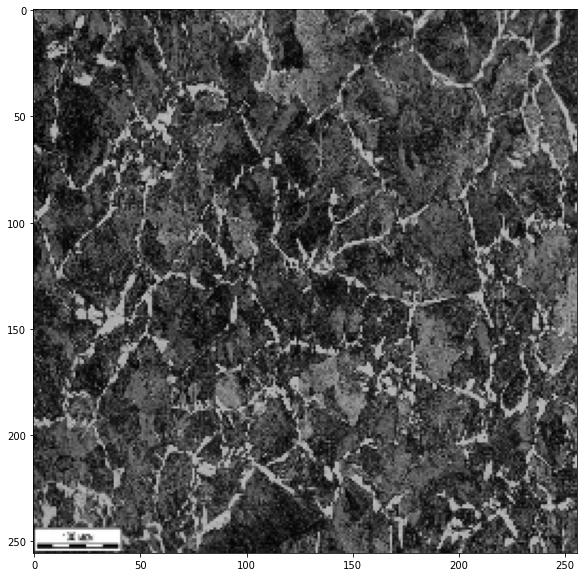

In [ ]:
img = cv2.imread('pic2.jpg')
img = cv2.resize(img,(256,256))
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
print(img.shape)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

(256, 256, 3)


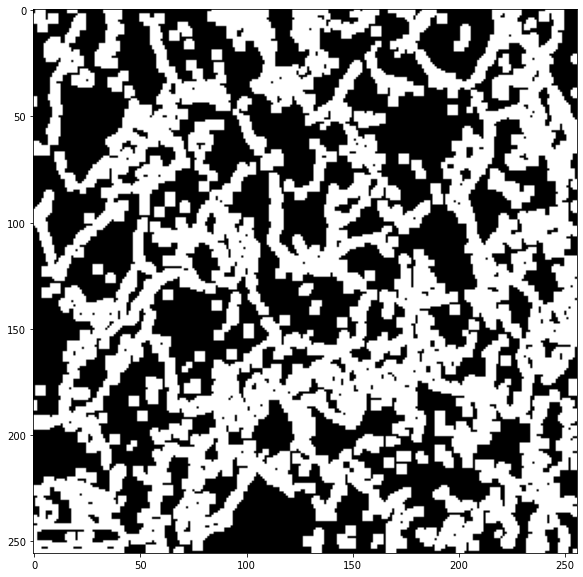

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.show()

In [ ]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
print (cnt)
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

[[[ 84   0]]

 [[ 83   1]]

 [[ 82   1]]

 ...

 [[109   4]]

 [[110   3]]

 [[110   0]]]


In [ ]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

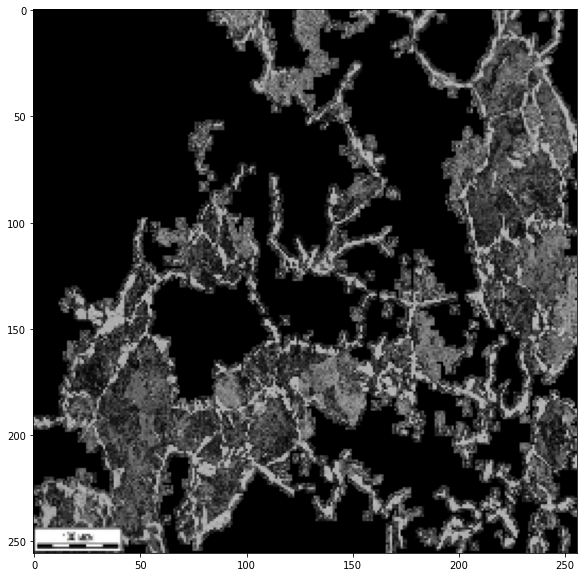

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(segmented)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
path ='pic2.jpg'
img = cv2.imread(path)

img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

In [ ]:
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

In [ ]:
thresh = threshold_otsu(img_gray)
img_otsu  = img_gray > thresh
filtered = filter_image(img, img_otsu)

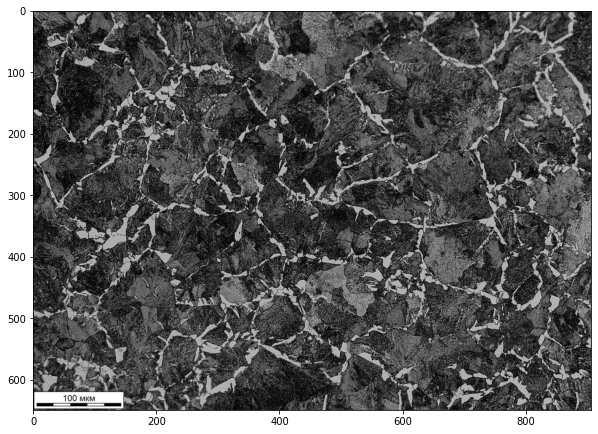

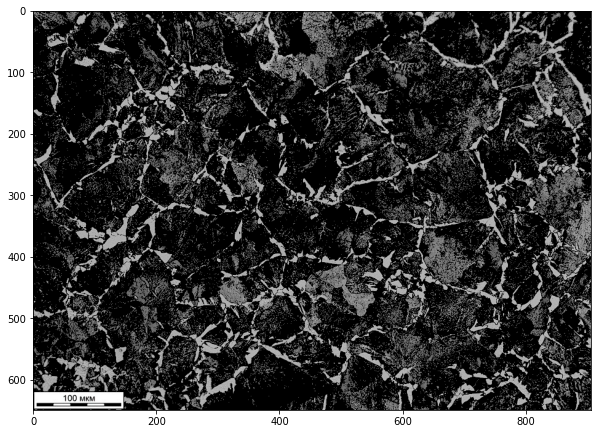

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(filtered)
plt.show()


In [ ]:
import cv2
path ='SSAU.jpg'
img = cv2.imread(path)

In [ ]:
#rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
# light_blue = (90, 70, 50)
# dark_blue = (128, 255, 255)
# You can use the following values for green
# light_green = (40, 40, 40)
# dark_greek = (70, 255, 255)

light_red = (0, 40, 40)
dark_red = (20, 255, 255)

mask = cv2.inRange(hsv_img, light_red, dark_red)


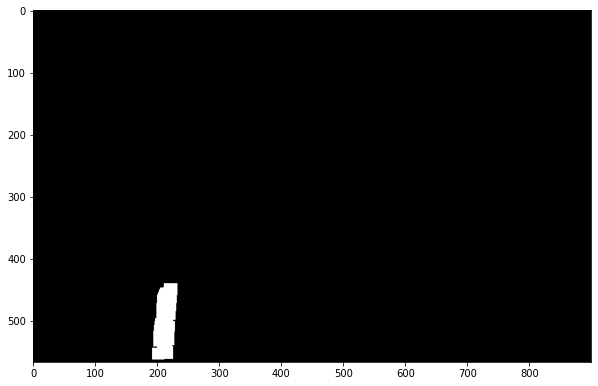

In [ ]:
iter = 4
mask = cv2.dilate(cv2.erode(mask,np.ones((5,5), dtype='uint8'), iterations=iter), 
                  np.ones((5,5), dtype='uint8'), iterations=iter)

plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
plt.show()

In [ ]:
result = cv2.bitwise_and(img, img, mask=mask)

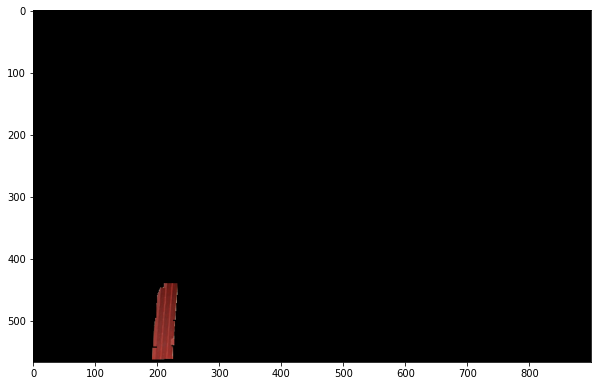

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()